# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [3]:
# Your work here.

Q1. Is the distribution of body temperatures normal?

We will first look into the histogram to find out the shape of the distribution.

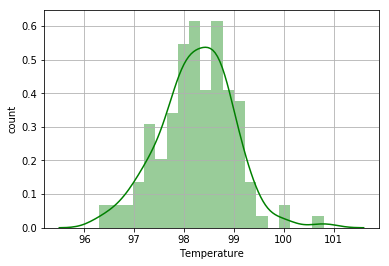

In [4]:
df = pd.read_csv('Desktop/Springboard/Mini_Projects/EDA_human_temperature/data/human_body_temperature.csv')
ax = sns.distplot(df['temperature'], bins=20, color="g")
ax.set_xlabel('Temperature')
ax.set_ylabel('count')
ax.grid(True)
plt.show()

It is difficult to say if the from the histogram if it is normally distributed. So we created a qqplot. If the datapoints lie on the 45 degree lines in qqplot the sample distribution is normal.

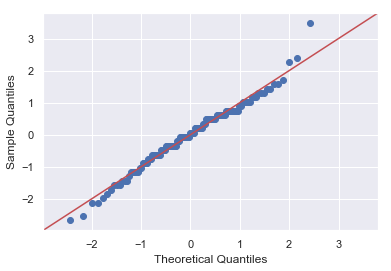

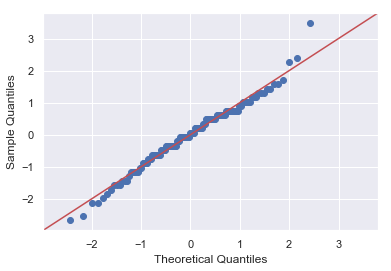

In [10]:
# plotting qqplot
sample_mean = np.mean(df['temperature'])
sample_sd = np.std(df['temperature'])
z = (df['temperature'] - mean) / sd
sm.qqplot(z, line='45')

The qqplot shows that there are couple of points above and below the 45 degree line suggesting the sample distribution is not perfectly normal. So we will plot empirical cumulative distribution function or ecdf of a normal distribution with same mean and standard deviation of the sample and the ecdf of the sample to compare.

In [6]:
# making an ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


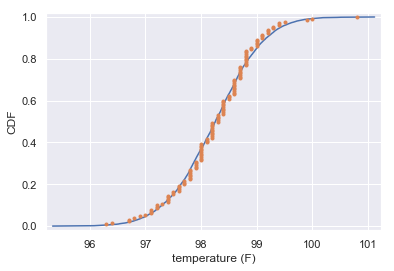

In [17]:
temp = np.array(df['temperature'])
x, y = ecdf(temp)
# creating normal distribution with same mean and std
mean = np.mean(temp)
std = np.std(temp)
samples = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(samples)

# plotting normally distributed and actual data
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('CDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

Answer:

The qqplot and CDF distribution suggest that the temerature sample is approximately normally distributed.


Q2. Is the sample size large? Are the observations independent?

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [8]:
sample_size = len(temp)
sample_mean = np.mean(temp)
print('sample size:', sample_size, 'sample mean:', sample_mean)

sample size: 130 sample mean: 98.24923076923075


Answer:

The sample size is not very large (only 130 observation). But to be eligible for Central Limit Theorem, the sample size should be larger than 30. From that perspective, the sample size is large.

The observations are independent as the body temperature of one person should not affect the body temperature of another person.

Q3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

Bootstrap hypothesis test: We assume that the population is normally distributed. With bootstrap sampling we can produce replicates even with a small sample size over and over.

Null hypothesis: sample mean same as true mean, i.e., 98.6; and

Alternative hypothesis: Sample mean not same as true mean, i.e., 98.6.

We would use one sample test.

In [1]:
## Generating many bootstrap replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [9]:
translated_temp = temp - np.mean(temp) + 98.6
# bootstrap replicate
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(temp)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0


Not a single bootstrap replicate had a mean value as extreme as the observed mean. That suggests that the null hypothesis should be rejected.

As the sample size is relatively large, we can use z-test. But the population standard deviation is not known. However, as the sample size is large we can use sample standard deviation.

With sample size > 30 both t-score and z-score produce similar result.

In [12]:
# calculate z-score
z = (sample_mean - 98.6)/(sample_sd/np.sqrt(sample_size))
print('z-score:', z)

z-score: -5.475925202078116


In [102]:
# calculate t_stat
def t_stat(data, mu):
    sample_mean = np.mean(data)
    sample_std = np.std(data)
    sample_size = len(data)
    t_score = (sample_mean - mu)/(sample_std/np.sqrt(sample_size))
    return t_score


In [104]:
# calculating t-stat
mu = 98.6
t_score = t_stat(temp, mu)
print('t_score :', t_score)

t_score : -5.4759252020785585


The z-score is the departure of sample mean from the hypothesised mean (98.6 F). The z-score value is -5.5 here, suggesting that the sample mean is 5.5 standard deviation away from the hypothesised mean. The critical z-score is (+,-) 1.96. A z-score of -5.5 suggests that the null hypothesis should be rejected.

The result is not basically different from the bootstrap approach. 

The p-value we observed earler from bootstrap approach is 0 for the number of replicates. If we increase the number even larger we will get some very low p-value. In both cases, we would reject the null hypothesis that the sample mean is same as true mean.

Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?


We will do the t-test because the sample size is 10 only.

In [105]:
small_sample = np.random.choice(temp, size=10)
print('Small random sample:', small_sample)
# t-stat for small sample
t_score = t_stat(small_sample, mu)
print('t_score :', t_score)

Small random sample: [98.8 98.2 98.2 98.6 98.9 99.1 98.8 99.2 98.8 98.4]
t_score : 0.9622504486493256


For a small sample like this t-test is applicable. The t-score from this small sample (size=10) is different than the original sample (size=130, t-score= -5.5). As we randomly choose 10 observations from 130 datapoints, we can obtain different t-score at each draw.

Q5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Answer:
We can assume that the data at 2 standard deviation away from the mean in either direction as abnormal. We can use the bootstarp relicates that we used earlier. We will calculate 95% conifidence interval for that.

In [14]:
# confidence interval from bootstrap replicate approach
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval from bootstrap approach:', conf_int)

95% confidence interval from bootstrap approach: [98.47230769 98.72692308]


Body temperature below 98.47 and above 98.72 degree F would be considered as abnormal as per bootstrap approach.

In [15]:
# confidence interval from margin of error approach, err_m, critical z-score = 1.96
# moe = 1.96 * sd / np.sqrt(n)
err_m = (1.96 * sample_sd)/np.sqrt(sample_size)
ci = sample_mean + np.array([-1, 1]) * err_m
print('95% confidence interval from error of margin:', ci)

95% confidence interval from error of margin: [98.1236798  98.37478173]


The confidence interval using error of margin is different from the bootstrap approach. Because the sample provided does represent the population data (i.e., sample mean not the same as true mean) we can not rely on the margin of error from the sample data. The sample mean was too low. Instead we would consider bootstrap approach.

Q6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.
You can include written notes in notebook cells using Markdown:


Answer: We first make hypothesis that there is no significant difference in temperature between male and female.
We will do a 2 sample hypothesis to test the difference. To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [72]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [107]:
temp_g = df.groupby('gender')['temperature'].mean()
print('female mean temp:', temp_g[0], 'Male mean temp:', temp_g[1])

female mean temp: 98.39384615384613 Male mean temp: 98.1046153846154


In [19]:
female_df = df[df.gender == 'F']
female_temp = np.array(female_df.temperature)
male_df = df[df.gender == 'M']
male_temp = np.array(male_df.temperature)
# generate shifted arrays with same mean
female_temp_shifted = female_temp - np.mean(female_temp) + np.mean(temp)
male_temp_shifted = male_temp - np.mean(male_temp) + np.mean(temp)
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_f = draw_bs_reps(female_temp_shifted, np.mean, size=100000)
bs_replicates_m = draw_bs_reps(male_temp_shifted, np.mean, size=100000)
# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_f - bs_replicates_m
# Compute fraction of replicates that are more than the observed and print p-value: p
p = np.sum(bs_replicates >= (np.mean(female_temp)-np.mean(male_temp))) / 100000
print('p-value =', p)

p-value = 0.01096


The p-value is 0.01 (< 0.05), suggesting 1 in 100 times we will see as extreme as the temperature difference we are seeing here between body temperatures of male and female. So, we can reject the null hypothesis that the body temperature of male and female are same. The observed difference is statistically significant.